### Tidy data  
What is the most flexible dataframe form?  
Using pivot and melt to change the shape of dataframes.  

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Long form, wide form and tidy form data

Here's a typical way you might be presented with some data. This is transcripts per million reads for 6 samples for each of 7 genes.

In [26]:
df = pd.read_csv('Infection_TPM.csv')
df

,Gene_ID,Control_Flower,Control_Leaf,Control_Root,Infected_Flower,Infected_Leaf,Infected_Root
0,NLR_1,34,2,0.0,45,23,14
1,NLR_2,1,3,NaN,33,12,12
2,JA_34,3,3,4.0,321,45,73
3,JA_13,5,23,NaN,45,23,54
4,JA_5,21,1,2.0,34,13,33
5,Aux_3,4,56,NaN,72,34,27
6,Aux_4,6,1,0.0,23,65,89


We can easily plot the gene expression levels for a tissue

<AxesSubplot:xlabel='Gene_ID', ylabel='Control_Flower'>

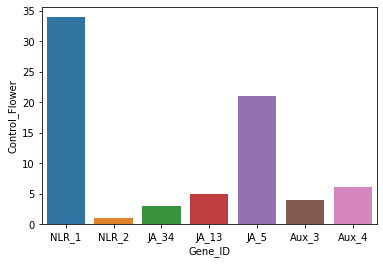

In [3]:
sns.barplot(x="Gene_ID", y="Control_Flower", data=df)

We could instead view the data by gene for each of the 6 samples

In [27]:
df2 = df.T
df2.columns = df2.iloc[0]
df2 = df2[1:]
df2.columns = df['Gene_ID'].values
df2

,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Control_Flower,34,1,3,5,21,4,6
Control_Leaf,2,3,3,23,1,56,1
Control_Root,0.0,NaN,4.0,NaN,2.0,NaN,0.0
Infected_Flower,45,33,321,45,34,72,23
Infected_Leaf,23,12,45,23,13,34,65
Infected_Root,14,12,73,54,33,27,89


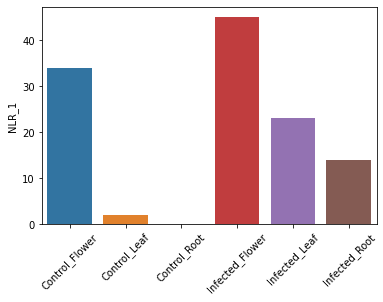

In [20]:
sns.barplot(x=df2.index, y="NLR_1", data=df2)
plt.xticks(rotation=45)
plt.show()

### Grouped data

But what if our focus is on infected and non-infected?  We have to do some juggling to get the datafarme in the right shape to plot useful graphs.  Here I am spliting a column in two, re-ordering the columns and grouping by Tissue and Disease.

In [ ]:
df2['Disease'], df2['Tissue'] = zip(*df2.index.str.split('_').tolist())
df2 = df2[['Tissue', 'Disease','NLR_1', 'NLR_2', 'JA_34', 'JA_13', 'JA_5', 'Aux_3', 'Aux_4']]
df2 = df2.reset_index(drop=True)

<AxesSubplot:xlabel='Tissue', ylabel='NLR_1'>

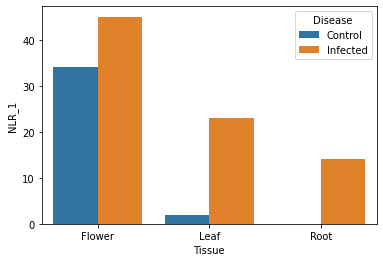

In [7]:
sns.barplot(x="Tissue", y="NLR_1", hue="Disease", data=df2)

In [55]:
df2

,Tissue,Disease,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
0,Flower,Control,34,1,3,5,21,4,6
1,Leaf,Control,2,3,3,23,1,56,1
2,Root,Control,0.0,NaN,4.0,NaN,2.0,NaN,0.0
3,Flower,Infected,45,33,321,45,34,72,23
4,Leaf,Infected,23,12,45,23,13,34,65
5,Root,Infected,14,12,73,54,33,27,89


The index here (0-5) isn't very infomative.  We can make the first two columns a multi-index, specifiying Tissue and Disease level, and making it easier to summarise the data.

In [58]:
df3 = df2.set_index(['Tissue', 'Disease'])
df3

,,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Tissue,Disease,,,,,,,
Flower,Control,34,1,3,5,21,4,6
Leaf,Control,2,3,3,23,1,56,1
Root,Control,0.0,NaN,4.0,NaN,2.0,NaN,0.0
Flower,Infected,45,33,321,45,34,72,23
Leaf,Infected,23,12,45,23,13,34,65
Root,Infected,14,12,73,54,33,27,89


In [59]:
df3.index.tolist()

[('Flower', 'Control'),
 ('Leaf', 'Control'),
 ('Root', 'Control'),
 ('Flower', 'Infected'),
 ('Leaf', 'Infected'),
 ('Root', 'Infected')]

We can examine the dataframe by either of these indexes, by name or by order of index.

In [60]:
df3.groupby('Disease').mean()

,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Disease,,,,,,,
Control,12.000000,2.0,3.333333,14.000000,8.000000,30.000000,2.333333
Infected,27.333333,19.0,146.333333,40.666667,26.666667,44.333333,59.000000


In [61]:
df3.groupby(level=0).mean()

,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Tissue,,,,,,,
Flower,39.5,17.0,162.0,25.0,27.5,38.0,14.5
Leaf,12.5,7.5,24.0,23.0,7.0,45.0,33.0
Root,7.0,12.0,38.5,54.0,17.5,27.0,44.5


In [62]:
df3.groupby('Tissue').mean()

,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Tissue,,,,,,,
Flower,39.5,17.0,162.0,25.0,27.5,38.0,14.5
Leaf,12.5,7.5,24.0,23.0,7.0,45.0,33.0
Root,7.0,12.0,38.5,54.0,17.5,27.0,44.5


In [64]:
df3.groupby('Disease').mean()

,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Disease,,,,,,,
Control,12.000000,2.0,3.333333,14.000000,8.000000,30.000000,2.333333
Infected,27.333333,19.0,146.333333,40.666667,26.666667,44.333333,59.000000


In [63]:
df3.groupby(level=1).mean()

,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Disease,,,,,,,
Control,12.000000,2.0,3.333333,14.000000,8.000000,30.000000,2.333333
Infected,27.333333,19.0,146.333333,40.666667,26.666667,44.333333,59.000000


### Tidy Data

"Tidy data" is a standardised format for dataframes which makes them easy to manage with standard approaches, and reduces the need to wrangle data into a new form for eaach new analysis/graph.  The key is deciing what the observations are and what the variable are.  A standard case would be that observaations are individuals measured and variables height, weight, PCT_magnesium of each individual.  Of course it is not always so straightforward.  The principals are laid out in this paper:

Wickham, Hadley. (August, 2014). “Tidy Data.” Journal of Statistical Software, 10(59).
https://vita.had.co.nz/papers/tidy-data.pdf  


There are three interrelated rules which make a dataset tidy:

    Each variable must have its own column.  
    Each observation must have its own row.  
    Each value must have its own cell.  
    
A value is a single piece of data (name of a gene, number of introns in a gene, expression level ina. specific experiment).  
A variable contains all values that measure the same underlying attribute (like height, temperature, duration) across units.  
An observation contains all values measured on the same unit (like a person, or a day, or a city) across attributes.  

In [8]:
df2

,Tissue,Disease,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
0,Flower,Control,34,1,3,5,21,4,6
1,Leaf,Control,2,3,3,23,1,56,1
2,Root,Control,0.0,NaN,4.0,NaN,2.0,NaN,0.0
3,Flower,Infected,45,33,321,45,34,72,23
4,Leaf,Infected,23,12,45,23,13,34,65
5,Root,Infected,14,12,73,54,33,27,89


This dataframe has 42 values:  
    
Gene, Disease states, and Tissues are variables  

    Tissues - three possible levels  
    Disease_state - 2 possible levels  
    Genes - 7 possible levels  
    
Samples of plant organs in different disease states are observations  
TPM counts are values 

To make this dataset tidy we need to arrange it with the Genes,  Disease and Tissue as column headers and the TMP values in rows.  Melt will allow as to do this, going form wide format to long format.  

Let's get a list of gene names to save having to type them

In [9]:
names = df.Gene_ID.tolist()

In [10]:
df3 = pd.melt(df2, id_vars=['Tissue','Disease'], value_vars= names, var_name='Gene_ID', value_name='TPM')
df3

,Tissue,Disease,Gene_ID,TPM
0,Flower,Control,NLR_1,34
1,Leaf,Control,NLR_1,2
2,Root,Control,NLR_1,0.0
3,Flower,Infected,NLR_1,45
4,Leaf,Infected,NLR_1,23
5,Root,Infected,NLR_1,14
6,Flower,Control,NLR_2,1
7,Leaf,Control,NLR_2,3
8,Root,Control,NLR_2,NaN
9,Flower,Infected,NLR_2,33


Now it's easy to plot the all the data by tissue

<AxesSubplot:xlabel='Tissue', ylabel='TPM'>

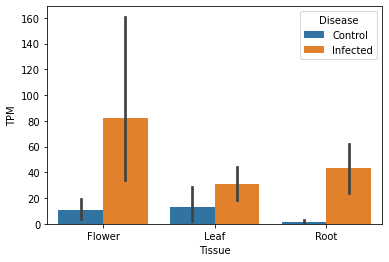

In [11]:
sns.barplot(x="Tissue", y="TPM", hue="Disease", data=df3)

Or break it down by gene

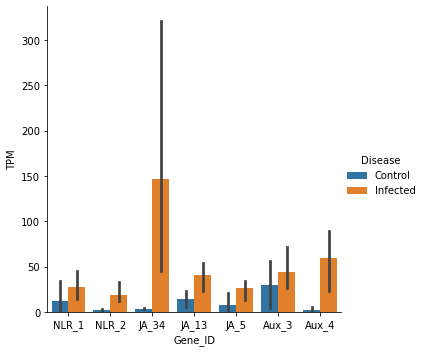

In [12]:
sns.catplot(x="Gene_ID", y="TPM", hue="Disease", data=df3, kind="bar")

or by gene

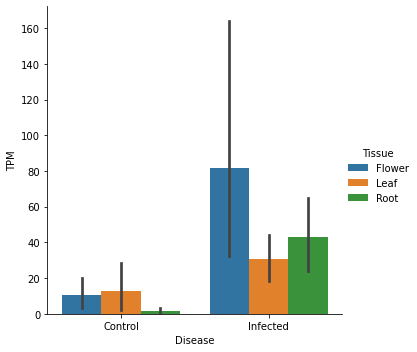

In [13]:
sns.catplot(x="Disease", y="TPM", hue="Tissue", data=df3, kind="bar")

or as individual plots by Organ type

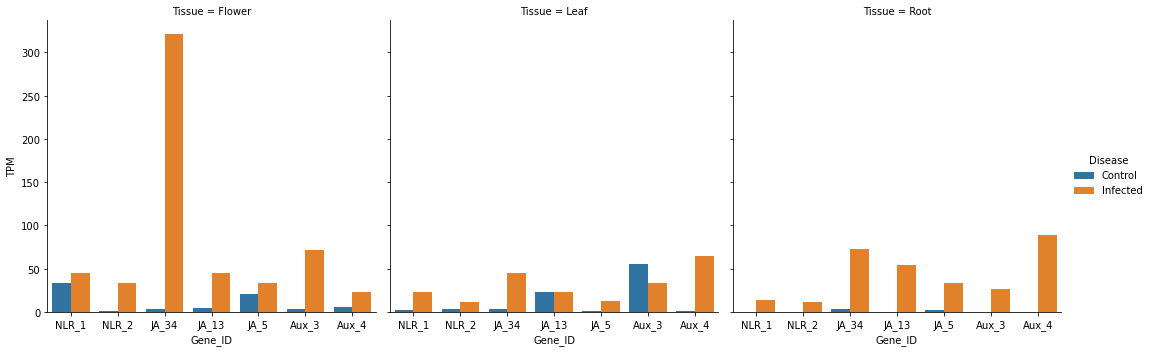

In [14]:
sns.catplot(x="Gene_ID", y="TPM", hue="Disease", data=df3, col='Tissue', kind="bar")

### Common problems in data form:   
To show you how pandas can re-format data we'll work though a few awkward datasets.  
  

 #### Column headers are values, not variable names. 

In [282]:
df = pd.read_csv("Greenland_nests.csv")
df

,Nesting Site,0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed
0,Qaanaq,0.21,0.00,0.57,0.22,0.00,356
1,Sisimiut,0.00,0.34,0.65,0.01,0.00,523
2,Maniitsoq,0.00,0.22,0.56,0.17,0.05,2113
3,Tasiilaq,0.34,0.45,0.12,0.09,0.00,67
4,Ittoqqortoormiit,0.44,0.25,0.31,0.00,0.00,266
5,Nuuk,0.02,0.57,0.23,0.13,0.05,734
6,Disko Bay,0.11,0.42,0.24,0.23,0.00,225


This dataframe has 42 values arranged by three different values:  
    
    Nesting_Site  - one of 7 locations
    Nests_Assessed - a count at each location
    Chick_N_Frequency - frequencies for five possible levels at each location

The *observations* are the chick count frequencies at each nesting site
    
*variables* are:
    Nesting site is a catagorical variable (text string) 
    Chick number is a catagorical variable (becuase of the >3 class)  
    Nests Assessed is a continous variable (integer), which is set for each nesting site.

In [283]:
df.columns

Index(['Nesting Site', '0 chicks', '1 chick', '2 chicks', '3 chicks ',
       '>3 chicks', 'Nests assessed'],
      dtype='object')

In [284]:
names = ['0 chicks', '1 chick', '2 chicks', '3 chicks ', '>3 chicks']
df2 = pd.melt(df, id_vars=['Nesting Site', 'Nests assessed'], value_vars=names, var_name='Chick_N', value_name='Freq')
df2

,Nesting Site,Nests assessed,Chick_N,Freq
0,Qaanaq,356,0 chicks,0.21
1,Sisimiut,523,0 chicks,0.00
2,Maniitsoq,2113,0 chicks,0.00
3,Tasiilaq,67,0 chicks,0.34
4,Ittoqqortoormiit,266,0 chicks,0.44
5,Nuuk,734,0 chicks,0.02
6,Disko Bay,225,0 chicks,0.11
7,Qaanaq,356,1 chick,0.00
8,Sisimiut,523,1 chick,0.34
9,Maniitsoq,2113,1 chick,0.22


<AxesSubplot:xlabel='Chick_N', ylabel='Freq'>

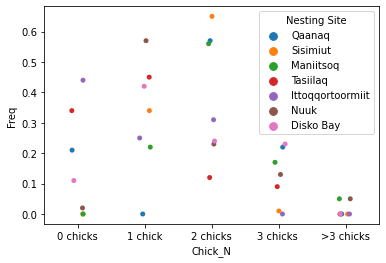

In [286]:
sns.stripplot(x="Chick_N", y="Freq", hue="Nesting Site", data=df2)

Might not be the loveliest graph (we will work more on this in later weeks) but all the data is there.

#### Multiple variables are stored in one column.   
This is a list of specimen locations for *Begonia conchifolia*.  Latitiude and longitude have been listed together in the fourth column

In [177]:
df = pd.read_csv("B_conch_loc.csv")
df

,Begonia conchifolia,Costa Rica,Liberia,"10.630573, -85.439346","Davidse, G., M. Sousa Sánchez, S. Knapp & F. Chiang Cabrera",2015,Saururaceae a Zygophyllaceae,Fl. Mesoamer.,"2(3): v–xvii, 1–347"
0,Begonia conchifolia,Costa Rica,San José,"9.934739, -84.087502","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",2015,Saururaceae a Zygophyllaceae,Fl. Mesoamer.,"2(3): v–xvii, 1–347"
1,Begonia conchifolia,Costa Rica,Alajuela,"10.582930, -84.261923","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
2,Begonia conchifolia,Costa Rica,Cartago,"9.588293, -85.296503","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
3,Begonia conchifolia,Costa Rica,Guanacaste,"9.629001, -84.929014","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
4,Begonia conchifolia,Costa Rica,Heredia,"10.113520, -85.166314","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
5,Begonia conchifolia,Costa Rica,San José,"10.228106, -85.012424","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
6,Begonia conchifolia,Panama,Coclé,"9.003572, -79.43242","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
7,Begonia conchifolia,Panama,Panamá,"8.983333, -79.51667","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131


The occurances of the plant are the observations (9 of them).  The variables are the country, location, latitude, longitude and reference.
Reference has been split up into five fields, latitudea dn longitude have been combined into one.  We should probably add a header as well.


Specify no header when we read it in

In [183]:
df = pd.read_csv("B_conch_loc.csv", header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8
0,Begonia conchifolia,Costa Rica,Liberia,"10.630573, -85.439346","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",2015,Saururaceae a Zygophyllaceae,Fl. Mesoamer.,"2(3): v–xvii, 1–347"
1,Begonia conchifolia,Costa Rica,San José,"9.934739, -84.087502","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",2015,Saururaceae a Zygophyllaceae,Fl. Mesoamer.,"2(3): v–xvii, 1–347"
2,Begonia conchifolia,Costa Rica,Alajuela,"10.582930, -84.261923","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131


In [146]:
df.dtypes

0            object
1            object
2            object
3            object
4            object
5             int64
6            object
7            object
8            object
Reference    object
dtype: object

The year - Column 5 is reading in as an interger.  That will cause issues.  We'll specify it as a string

In [184]:
df[5] = df[5].astype('string')
df.dtypes

0    object
1    object
2    object
3    object
4    object
5    string
6    object
7    object
8    object
dtype: object

Now we can make the reference into a single column of text string, and delete the individual columns

In [185]:
df["Reference"] = df[4] + " " + df[5] +" " + df[6] + " " + df[7]+ " " + df[8]
df = df.drop([4,5,6,7,8], axis = 1)
df.head(3)

,0,1,2,3,Reference
0,Begonia conchifolia,Costa Rica,Liberia,"10.630573, -85.439346","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C..."
1,Begonia conchifolia,Costa Rica,San José,"9.934739, -84.087502","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C..."
2,Begonia conchifolia,Costa Rica,Alajuela,"10.582930, -84.261923","Burt-Utley, K. 1985 A revision of Central Amer..."


Now we need to split lat and long

In [186]:
df[["Latitude", "Longitude"]] = df[3].str.split(', ',n=1, expand=True)
df.head(3)

,0,1,2,3,Reference,Latitude,Longitude
0,Begonia conchifolia,Costa Rica,Liberia,"10.630573, -85.439346","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",10.630573,-85.439346
1,Begonia conchifolia,Costa Rica,San José,"9.934739, -84.087502","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",9.934739,-84.087502
2,Begonia conchifolia,Costa Rica,Alajuela,"10.582930, -84.261923","Burt-Utley, K. 1985 A revision of Central Amer...",10.582930,-84.261923


We can now drop the joint column and re-name the remaining columns

In [187]:
names=["Species", "Country", "Location", "Latitude", "Longitude", "Reference"]
df = df.drop([3], axis = 1)
df = df.rename({0: 'Species', 1: 'Country', 2:'Location'}, axis=1) 
df

,Species,Country,Location,Reference,Latitude,Longitude
0,Begonia conchifolia,Costa Rica,Liberia,"Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",10.630573,-85.439346
1,Begonia conchifolia,Costa Rica,San José,"Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",9.934739,-84.087502
2,Begonia conchifolia,Costa Rica,Alajuela,"Burt-Utley, K. 1985 A revision of Central Amer...",10.582930,-84.261923
3,Begonia conchifolia,Costa Rica,Cartago,"Burt-Utley, K. 1985 A revision of Central Amer...",9.588293,-85.296503
4,Begonia conchifolia,Costa Rica,Guanacaste,"Burt-Utley, K. 1985 A revision of Central Amer...",9.629001,-84.929014
5,Begonia conchifolia,Costa Rica,Heredia,"Burt-Utley, K. 1985 A revision of Central Amer...",10.113520,-85.166314
6,Begonia conchifolia,Costa Rica,San José,"Burt-Utley, K. 1985 A revision of Central Amer...",10.228106,-85.012424
7,Begonia conchifolia,Panama,Coclé,"Burt-Utley, K. 1985 A revision of Central Amer...",9.003572,-79.43242
8,Begonia conchifolia,Panama,Panamá,"Burt-Utley, K. 1985 A revision of Central Amer...",8.983333,-79.51667


This is now ready to do some GIS analysis with

#### Variables are stored in both rows and columns.   
This dataset has counts of hairs on the abaxial (underside) and adaxial (upperside) of three leaves per plant along with data on expression pattern for three genes per plant and the plant's genotype.  
This is a really horrible format in that we have six counts per plant, three abaxial in one row and three adaxial in annother row.  We also have data which is the same for each plant which is only listed on one row.

In [252]:
df = pd.read_csv("leaves.csv")
df

,Plant,Genotype,ADH1,SSC2,SSC3,1,2,3,Side
0,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,1,1,2,Adaxial
1,NaN,NaN,NaN,NaN,NaN,2,1,3,Abaxial
2,MK_560_2,ddm1/+,223.0,43.0,14.0,2,1,1,Adaxial
3,NaN,NaN,NaN,NaN,NaN,3,2,3,Abaxial
4,MK_560_3,wt,432.0,12.0,67.0,1,1,2,Adaxial
5,NaN,NaN,NaN,NaN,NaN,3,2,3,Abaxial
6,MK_560_4,ddm1/+,189.0,37.0,10.0,2,1,1,Adaxial
7,NaN,NaN,NaN,NaN,NaN,1,3,2,Abaxial
8,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,1,1,1,Adaxial
9,NaN,NaN,NaN,NaN,NaN,3,2,2,Abaxial


Let's deal first with filling in the missing data.

In [253]:
df = df.fillna(method='ffill')
df

,Plant,Genotype,ADH1,SSC2,SSC3,1,2,3,Side
0,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,1,1,2,Adaxial
1,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,2,1,3,Abaxial
2,MK_560_2,ddm1/+,223.0,43.0,14.0,2,1,1,Adaxial
3,MK_560_2,ddm1/+,223.0,43.0,14.0,3,2,3,Abaxial
4,MK_560_3,wt,432.0,12.0,67.0,1,1,2,Adaxial
5,MK_560_3,wt,432.0,12.0,67.0,3,2,3,Abaxial
6,MK_560_4,ddm1/+,189.0,37.0,10.0,2,1,1,Adaxial
7,MK_560_4,ddm1/+,189.0,37.0,10.0,1,3,2,Abaxial
8,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,1,1,1,Adaxial
9,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,3,2,2,Abaxial


Now we have all the data there we can deal with the format.

    Each variable must have its own column.  
    Each observation must have its own row.  
    Each value must have its own cell.  
    
Variables: Plant, Genotype, Gene_name, Gene_expression, Sample_number, Abaxial_Hair_count, Adaxial_Hair_count.  Each will have it's own column
Observations: Each sample   

In [194]:
df.columns

Index(['Plant', 'Genotype', 'ADH1', 'SSC2', 'SSC3', '1', '2', '3', 'Side'], dtype='object')

In [254]:
Set_variables = ['Plant', 'Genotype','ADH1', 'SSC2', 'SSC3', 'Side']
Value_variables = ['1', '2', '3']

In [255]:
df2 = pd.melt(df, id_vars=Set_variables, value_vars=Value_variables, var_name='Sample', value_name='Count')
df2

,Plant,Genotype,ADH1,SSC2,SSC3,Side,Sample,Count
0,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,Adaxial,1,1
1,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,Abaxial,1,2
2,MK_560_2,ddm1/+,223.0,43.0,14.0,Adaxial,1,2
3,MK_560_2,ddm1/+,223.0,43.0,14.0,Abaxial,1,3
4,MK_560_3,wt,432.0,12.0,67.0,Adaxial,1,1
5,MK_560_3,wt,432.0,12.0,67.0,Abaxial,1,3
6,MK_560_4,ddm1/+,189.0,37.0,10.0,Adaxial,1,2
7,MK_560_4,ddm1/+,189.0,37.0,10.0,Abaxial,1,1
8,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,Adaxial,1,1
9,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,Abaxial,1,3


This is looking better, but the counts on the abaxial side and the adaxial side are not the same thing.  We should give them their own columns.  We do this by going from this long form to a wider form of dataframe using pivot.

In [256]:
df2.columns

Index(['Plant', 'Genotype', 'ADH1', 'SSC2', 'SSC3', 'Side', 'Sample', 'Count'], dtype='object')

In [257]:
df3 = pd.pivot(df2, index=['Plant', 'Genotype', 'ADH1', 'SSC2', 'SSC3', 'Sample'], columns='Side', values='Count')
df3

Side                                       Abaxial  Adaxial
Plant    Genotype  ADH1  SSC2 SSC3 Sample                  
MK_560_1 ddm1/ddm1 432.0 12.0 67.0 1             2        1
                                   2             1        1
                                   3             3        2
MK_560_2 ddm1/+    223.0 43.0 14.0 1             3        2
                                   2             2        1
                                   3             3        1
MK_560_3 wt        432.0 12.0 67.0 1             3        1
                                   2             2        1
                                   3             3        2
MK_560_4 ddm1/+    189.0 37.0 10.0 1             1        2
                                   2             3        1
                                   3             2        1
MK_560_5 ddm1/ddm1 543.0 8.0  53.0 1             3        1
                                   2             2        1
                                   3             2        1
MK_560_6 ddm1/+    254.0 28.0 20.0 1             2        1
                                   2             3        2
                                   3             3        1

The first four 'column' here are indexes.  We can convert them to columns which will make them more flexible to work with:

In [258]:
df3 = df3.reset_index()
df3

Side,Plant,Genotype,ADH1,SSC2,SSC3,Sample,Abaxial,Adaxial
0,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,1,2,1
1,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,2,1,1
2,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,3,3,2
3,MK_560_2,ddm1/+,223.0,43.0,14.0,1,3,2
4,MK_560_2,ddm1/+,223.0,43.0,14.0,2,2,1
5,MK_560_2,ddm1/+,223.0,43.0,14.0,3,3,1
6,MK_560_3,wt,432.0,12.0,67.0,1,3,1
7,MK_560_3,wt,432.0,12.0,67.0,2,2,1
8,MK_560_3,wt,432.0,12.0,67.0,3,3,2
9,MK_560_4,ddm1/+,189.0,37.0,10.0,1,1,2


The index column is labeled "Side".  This isn't correct anymore and we should get rid of it.

In [259]:
df3 = df3.rename_axis(None, axis=1)
df3

,Plant,Genotype,ADH1,SSC2,SSC3,Sample,Abaxial,Adaxial
0,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,1,2,1
1,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,2,1,1
2,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,3,3,2
3,MK_560_2,ddm1/+,223.0,43.0,14.0,1,3,2
4,MK_560_2,ddm1/+,223.0,43.0,14.0,2,2,1
5,MK_560_2,ddm1/+,223.0,43.0,14.0,3,3,1
6,MK_560_3,wt,432.0,12.0,67.0,1,3,1
7,MK_560_3,wt,432.0,12.0,67.0,2,2,1
8,MK_560_3,wt,432.0,12.0,67.0,3,3,2
9,MK_560_4,ddm1/+,189.0,37.0,10.0,1,1,2


We could simplfy the dataframe by summarizing the values by average hair count across all the samples counted.

In [262]:
df4 = df3.groupby(['Plant', 'Genotype']).mean()
df4 = df4.rename({'Abaxial': 'Ab_mean', 'Adaxial':'Ad_mean'}, axis=1) 

In [263]:
df4 = df4.reset_index()
df4

,Plant,Genotype,ADH1,SSC2,SSC3,Ab_mean,Ad_mean
0,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,2.000000,1.333333
1,MK_560_2,ddm1/+,223.0,43.0,14.0,2.666667,1.333333
2,MK_560_3,wt,432.0,12.0,67.0,2.666667,1.333333
3,MK_560_4,ddm1/+,189.0,37.0,10.0,2.000000,1.333333
4,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,2.333333,1.000000
5,MK_560_6,ddm1/+,254.0,28.0,20.0,2.666667,1.333333


If it was gene expression levels we wanted to focus on rather than leaf hairs we might want to make a colum of gene names and have the expression levels as a column of values.  This is going from wide form to long form so needs melting.

In [264]:
Set_variables = ['Plant', 'Genotype','Ab_mean','Ad_mean']
Value_variables = ['ADH1', 'SSC2', 'SSC3']

In [265]:
df5 = pd.melt(df4, id_vars=Set_variables, value_vars=Value_variables, var_name='Gene', value_name='Expression_level')
df5

,Plant,Genotype,Ab_mean,Ad_mean,Gene,Expression_level
0,MK_560_1,ddm1/ddm1,2.000000,1.333333,ADH1,432.0
1,MK_560_2,ddm1/+,2.666667,1.333333,ADH1,223.0
2,MK_560_3,wt,2.666667,1.333333,ADH1,432.0
3,MK_560_4,ddm1/+,2.000000,1.333333,ADH1,189.0
4,MK_560_5,ddm1/ddm1,2.333333,1.000000,ADH1,543.0
5,MK_560_6,ddm1/+,2.666667,1.333333,ADH1,254.0
6,MK_560_1,ddm1/ddm1,2.000000,1.333333,SSC2,12.0
7,MK_560_2,ddm1/+,2.666667,1.333333,SSC2,43.0
8,MK_560_3,wt,2.666667,1.333333,SSC2,12.0
9,MK_560_4,ddm1/+,2.000000,1.333333,SSC2,37.0


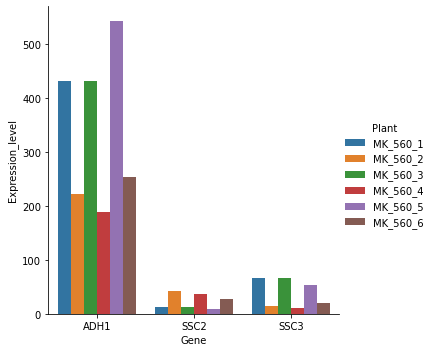

In [267]:
sns.catplot(x='Gene', y='Expression_level', hue='Plant', data=df5, kind='bar')

Or maybe more informativly:

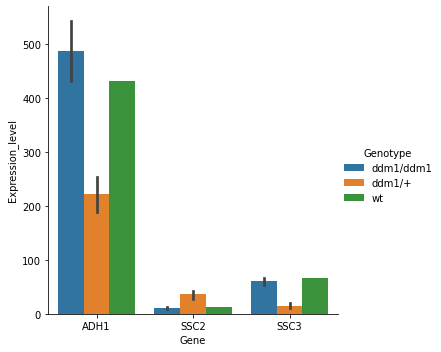

In [266]:
sns.catplot(x='Gene', y='Expression_level', hue='Genotype', data=df5, kind='bar')